<h1 style="text-align : center"> <font color="red" size=7>OUTLIER </h1>

## <font color="dark blue">WHAT IS OUTLIER?<font color/>
- Outlier is a data point that's very different from other data points in a dataset.
- Outlier can be caused by measuremen errors, data corruption or real world event.
- eg: Suppose in a class there are 6 students, & the salary of students are like 40k,50k,30,60k,35k,1cr, in that case we can assume that the 1cr guy is a outlier.

### <font color="brown">WHY OUTLIERS ARE DANGEREOUS?<font color/>
- Beacuse it affect the Machine Learning Models (Garbage In Garbage Out)

### <font color="brown">HOW TO DETECT THE OUTLIERS?<font color/>
- By using Box Plot & Percentile Method.

### <font color="brown">HOW TO TREAT THE OUTLIERS?<font color/>
- There are two types of Treatment of Outliers.
> - __TRIMMING__ : By using this technique, we delete all the outliers.
> - __CAPPING__ : By using this technque, we bring all the outliers in a range.
      >> - By using Z-Score, IQR, Percentile Method.

## <font color="orange">TRIMMING TECHNIQUE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"D:\DUDUL DS\ML\MY NOTES\2. EDA\DATASETS\placement.csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


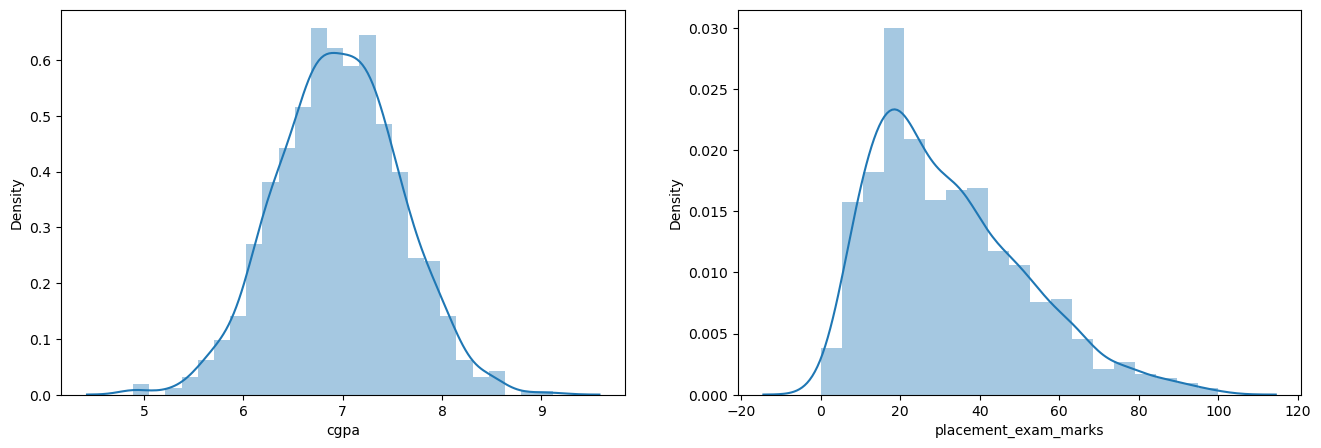

In [3]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [4]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

# Above Highest allowed, Below Lowest allowed value are outliers

Highest allowed 8.808933625397177
Lowest allowed 5.113546374602842


In [5]:
# Finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [6]:
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


## <font color="orange">CAPPING TECHNIQUE

### <font color="blue">1. Z-Score TECHNIQUE
- It only applicable when the feature is Normally distributed.

In [7]:
# cgpa column is normally distributed
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

In [8]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [9]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [10]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

### <font color="blue">2. IQR TECHNIQUE
- IQR Stands for Inter Quartile Range.
- IQR use to treat the Outliers.

#### STEP-1
$$ IQR= Q_3 - Q_1 $$

$$ IQR= 75\% \;Percentile - 25\% \; Percentile $$

#### STEP-2

$$ lower\;limit = Q_1 - 1.5\times IQR $$
$$ higher\; limit = Q_3 + 1.5\times IQR $$

### <font color="greem">BOX PLOT
- Box Plot used for Detecting Outliers by Visualization.
- It has Minimum value, 25% percentile, 50% percentile (Median), 75% percentile, Maximum Value.
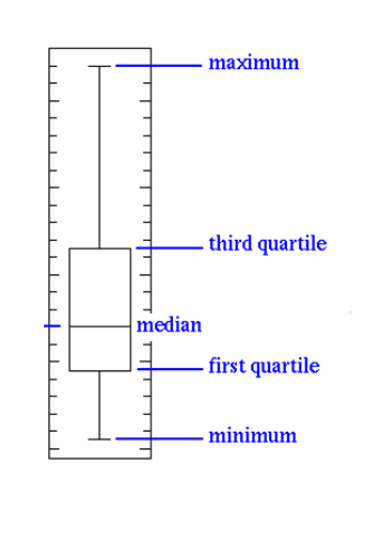

In [11]:
df

,cgpa,placement_exam_marks,placed
0,7.190000,26.0,1
1,7.460000,38.0,1
2,7.540000,40.0,1
3,6.420000,8.0,1
4,7.230000,17.0,0
...,...,...,...
995,8.808934,44.0,1
996,8.808934,65.0,1
997,5.113546,34.0,0
998,8.620000,46.0,1


In [12]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<AxesSubplot:xlabel='placement_exam_marks'>

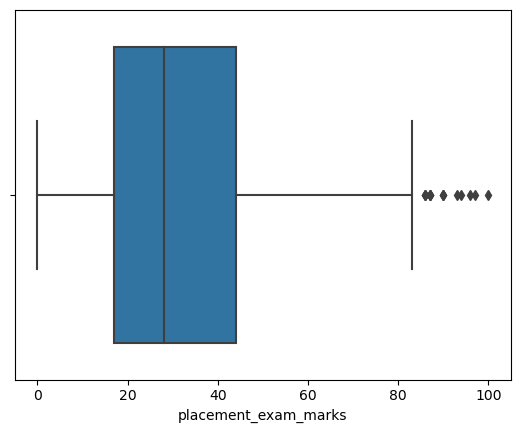

In [13]:
sns.boxplot(df['placement_exam_marks'])

In [14]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [15]:
percentile75

44.0

In [16]:
iqr = percentile75 - percentile25

In [17]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [18]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


In [19]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [20]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


In [21]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = new_df_cap['placement_exam_marks'].apply(lambda x : lower_limit if x < lower_limit  else  upper_limit  if x > upper_limit else x)

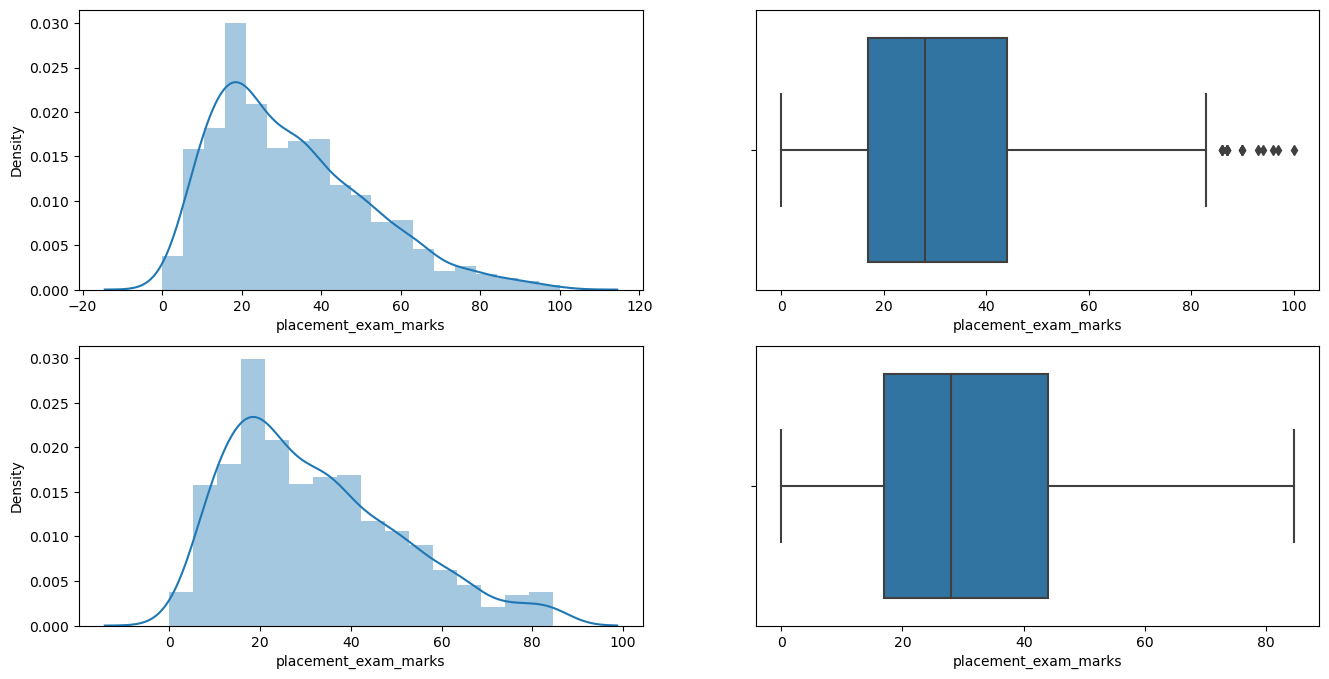

In [22]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()

### <font color="blue">3. PERCENTILE TECHNIQUE
- This technique also used for Outlier detection & treatment.

In [23]:
df

,cgpa,placement_exam_marks,placed
0,7.190000,26.0,1
1,7.460000,38.0,1
2,7.540000,40.0,1
3,6.420000,8.0,1
4,7.230000,17.0,0
...,...,...,...
995,8.808934,44.0,1
996,8.808934,65.0,1
997,5.113546,34.0,0
998,8.620000,46.0,1


In [24]:
df["placement_exam_marks"].quantile([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])

0.0      0.0
0.1     10.0
0.2     16.0
0.3     19.0
0.4     23.0
0.5     28.0
0.6     34.0
0.7     40.0
0.8     48.0
0.9     60.0
1.0    100.0
Name: placement_exam_marks, dtype: float64

In [25]:
df["placement_exam_marks"].quantile([0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1])

0.90     60.00
0.91     61.09
0.92     63.00
0.93     64.00
0.94     66.00
0.95     68.00
0.96     71.04
0.97     76.00
0.98     79.02
0.99     87.00
1.00    100.00
Name: placement_exam_marks, dtype: float64

In [26]:
df[df["placement_exam_marks"]>df["placement_exam_marks"].quantile(0.90)]

,cgpa,placement_exam_marks,placed
9,7.750000,94.0,1
40,6.600000,86.0,1
42,7.460000,71.0,1
43,7.850000,63.0,0
61,7.510000,86.0,0
...,...,...,...
947,6.490000,70.0,0
966,6.240000,72.0,1
987,6.770000,62.0,0
994,6.480000,63.0,0


In [27]:
df["placement_exam_marks_new"]=df["placement_exam_marks"]
df["placement_exam_marks_new"][df["placement_exam_marks"]>df["placement_exam_marks"].quantile(0.90)]=df["placement_exam_marks"].median()

<AxesSubplot:xlabel='placement_exam_marks_new'>

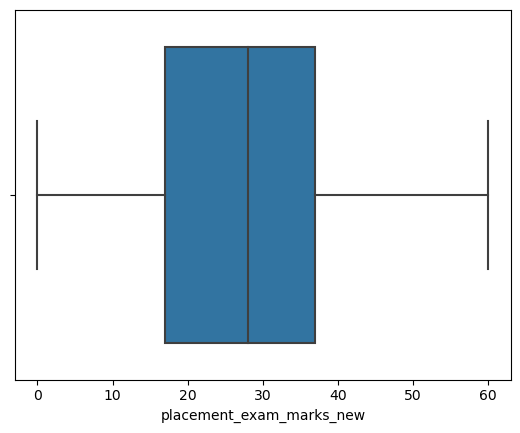

In [28]:
sns.boxplot(df["placement_exam_marks_new"])